In [37]:
import pandas as pd

In [38]:
df = pd.read_csv("BikeSharingAssignment.csv")

In [39]:
print("the dataset:")
print(df)

the dataset:
                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        8

In [40]:
print("checking the missing values")
print(df.isnull().sum())

checking the missing values
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [41]:
print("duplicate rows")
print(df.duplicated().sum())

duplicate rows
0


In [42]:
print("handaling missing data")
df = df.dropna()

handaling missing data


In [43]:
df_encode = pd.get_dummies(df,columns=['season','weather'], prefix=['season', 'weather'])
print(df_encode.head())

              datetime  holiday  workingday  temp   atemp  humidity  \
0  2011-01-01 00:00:00        0           0  9.84  14.395        81   
1  2011-01-01 01:00:00        0           0  9.02  13.635        80   
2  2011-01-01 02:00:00        0           0  9.02  13.635        80   
3  2011-01-01 03:00:00        0           0  9.84  14.395        75   
4  2011-01-01 04:00:00        0           0  9.84  14.395        75   

   windspeed  casual  registered  count  season_1  season_2  season_3  \
0        0.0       3          13     16      True     False     False   
1        0.0       8          32     40      True     False     False   
2        0.0       5          27     32      True     False     False   
3        0.0       3          10     13      True     False     False   
4        0.0       0           1      1      True     False     False   

   season_4  weather_1  weather_2  weather_3  weather_4  
0     False       True      False      False      False  
1     False       

In [44]:
target = df['count'].describe()
print("Target Variable")
print(target)

Target Variable
count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64


Analyze Relationships


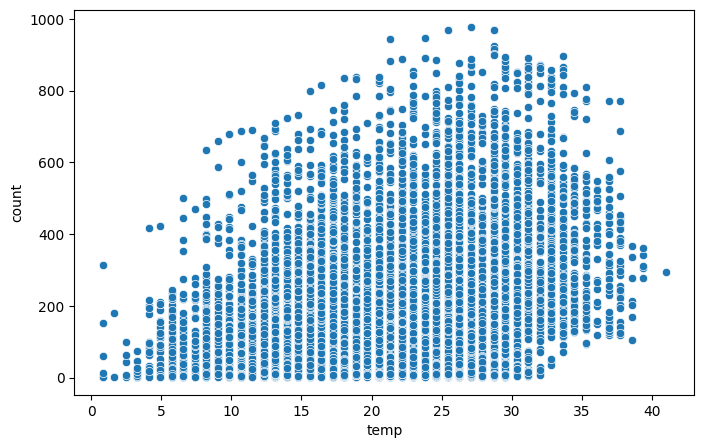

In [45]:
print("Analyze Relationships")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='count', data=df)
plt.show()

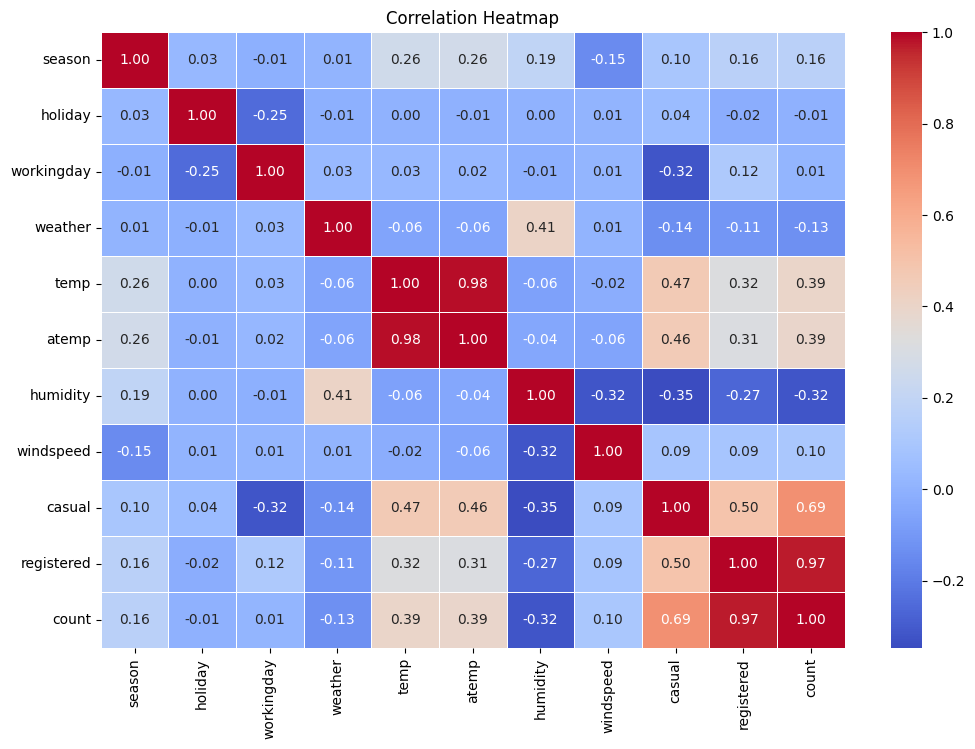

In [46]:
if "datetime" in df.columns:
    df["datetime"] = pd.to_datetime(df["datetime"])

numeric_df = df.select_dtypes(include=["number"])

df = pd.read_csv("BikeSharingAssignment.csv")

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [47]:
df["datetime"] = pd.to_datetime(df["datetime"])

df["month"] = df["datetime"].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df["season"] = df["month"].apply(get_season)
season_mapping = {"Winter": 1, "Spring": 2, "Summer": 3, "Fall": 4}
df["season_encoded"] = df["season"].map(season_mapping)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,season_encoded
0,2011-01-01 00:00:00,Winter,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1
1,2011-01-01 01:00:00,Winter,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,Winter,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1
3,2011-01-01 03:00:00,Winter,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1
4,2011-01-01 04:00:00,Winter,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1


Mean Absolute Error (MAE): 0.00
Root Mean Squared Error (RMSE): 0.00
R² Score: 1.00


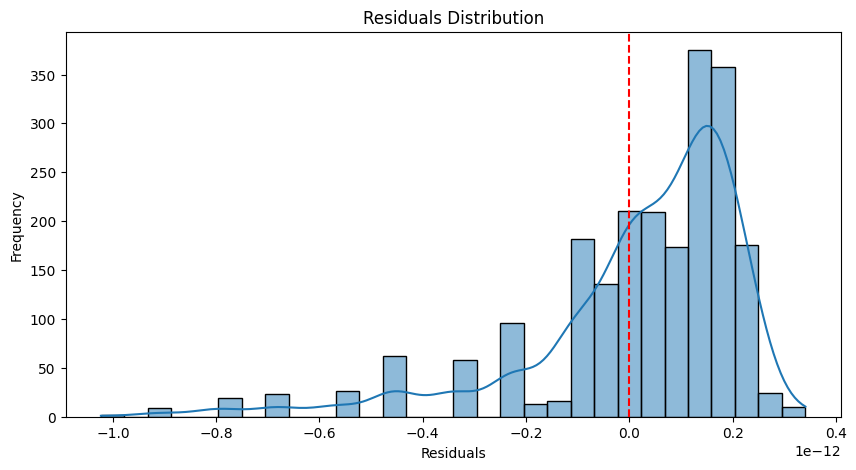

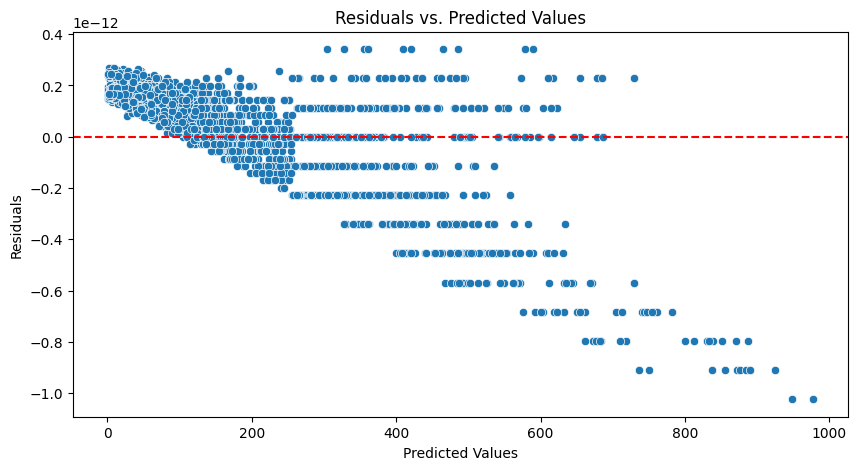

In [55]:
# تأكد من تحويل العمود datetime إلى نوع البيانات datetime
df["datetime"] = pd.to_datetime(df["datetime"])

# اختر العمود الصحيح للهدف
target_column = 'count'  # العمود الهدف هو count

# اختر الأعمدة الرقمية واذهب لإزالة العمود الهدف
X = df.select_dtypes(include=["number"]).drop(columns=[target_column])
y = df[target_column]

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء نموذج الانحدار الخطي وتدريبه
model = LinearRegression()
model.fit(X_train, y_train)

# توقع القيم على مجموعة الاختبار
y_pred = model.predict(X_test)

# حساب مقاييس التقييم
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='dashed')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()
